# Introduction to Neural Networks

So far this year, we've been familiarizing ourselves with some of the fundamental Python skills and tools that we'll need to know when we start working on a *Data Science* project. We've covered things like retrieving, formatting, cleaning, and plotting data. 

While there are many more Python tools to learn about, this month we'll be focusing on learning more about what happens under the hood - this way, we'll have a better understanding of how *Data Science* works and the benefits of leveraging it to find solutions and answers to whatever questions we may have.

With that, let's take a look at this thing called a Neural Network.

## So...What is a Neural Network Anyway?

Let's break the term down:

- **neu·ral** */ˈn(y)o͝orəl/* - relating to a nerve or nervous system
- **net·work** */ˈnetˌwərk/* - an interconnected group or system

In the context of Data Science, neural networks then are interconnected systems that learn and make decisions in a way modeled after the human brain. Specifically, these are referred to as **Artificial Neural Networks (ANN)**.

Sounds kinda complicated, huh?

Well, not really...fundamentally anyway. Think of it as a three part system:

1. Input 
    - In our case, we would take input through our senses (what we see, hear, smell, etc...).
    - ANNs on the other hand, get input from data through I/O actions (i.e. reading files).
2. Perception
    - In both cases (Humans and Computers), this is where the input is processed. Signals are passed between all of the different functons the *brain* is capable of running. Hopefully, we learn from any mistakes that are made.
3. Output
    - Finally, once a decision has been made, we communicate to the world what we've discovered.
    
### Us
![](images/nn.png)

### Computers (us too really)
![](images/ann.jpg)

As we continue our work this year, we will utilize Machine Learning algorithms and tools that attempt to answer our questions using complex neural networks to extract value from data. This month though, I'd like to take an opportunity to go over some fundamental concepts that make up an ANN. We'll do so by programming our very own (very simple) neural network.

Before we introduce our sample problem, let's introduce the *perceptron*.

![](images/simple_perceptron.png)

## A Sample Problem

Our learning exercise today will involve the creation of a simple perceptron that, when given a coordinate (x and y value), will correctly tell us on which side of a line it should go. Specifically, it will label the point as belonging to class **1** (above the line) or the class **-1** (below the line).

This particular perceptron will learn how to do its job in a *supervised* fashion, meaning we will train it using data for which we already know the answer.

So, using some of the skills we've learned already this year, lets plot our line and generate a training data set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Let's start by showing our plot with a line where x = y, and adding 100 random points to it

# Create an array of points for our line's x and y values. 
line = np.linspace(0, 1, 10)

# Use np.random.rand to create a 2 arrays with 100 random values in each
training_points = np.random.rand(100, 2)
# And create a DataFrame out of it
training_df = pd.DataFrame(training_points, columns=['x', 'y'])

# And take a look at our training points
training_df.head()

,x,y
0,0.204484,0.341150
1,0.753800,0.079814
2,0.123824,0.149967
3,0.202711,0.290413
4,0.263276,0.422798


In [3]:
# Since we're using supervised learning, let's add a label 
# to tell us which side of the line the point is on.
# Since our line is so simple, we can figure this out by
# comparing the x and y values.
def which_class(x, y):
    if x > y:
        return -1 #below
    else:
        return 1 #above

training_df['label'] = training_df.apply(lambda row: which_class(row['x'], row['y']), axis=1)
training_df.head(10)

,x,y,label
0,0.204484,0.341150,1
1,0.753800,0.079814,-1
2,0.123824,0.149967,1
3,0.202711,0.290413,1
4,0.263276,0.422798,1
5,0.001819,0.085006,1
6,0.187426,0.852807,1
7,0.565618,0.527721,-1
8,0.237716,0.955239,1
9,0.464145,0.296311,-1


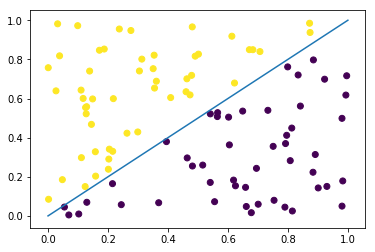

In [4]:
# Let's go ahead an plot everything
plt.plot(line, line)
plt.scatter(training_df['x'], training_df['y'], c=training_df['label'])
plt.show()

## Back to the fun stuff

Ok, now that we have our training data set up, let's talk about our *perceptron* some more.

Here are the key things it must do:

### 1. Initialize Some Weights and a *Learning Rate*

Remember, an important part of the process are the weights - these are what we tweek and adjust until we find an optimal setting. This really is where the *learning* happens.

For this simple example, we'll really only need two weights - one for the x values and one for the y values. But, what should those values be at the begining? Well, that's a discussion for another time - in fact, the process for deciding that is a field of machine learning all by itself. For now, we'll just use random values.

We can accomplish this easily using:

```python
>>> np.random.randn(2)
array([-0.16032296,  1.07890003])
```

The *learning rate* is a value that we'll use to throttle how much to adjust weights later on. Typically, it's a small number, like 0.1.


### 2. *Train* Our Perceptron

This is a multi-step process that we'll do in an iterative fashion. The goal here is to run some calculation that will guess whether a point belongs to the 1 class or -1 class. Depending on the answer, we'll make adjustment to the weights.

**Step 1.** Apply the existing weights to the points. This is as easy as multiplying each coordinate by its corresponding weight. For example, if we had a point equal to ```(0.2, 0.4)``` and weights equal to ```(0.1, 0.5)```, our weighted points would be ```(0.02, 0.2)```.

**Step 2.** Run some calculation on the weighted points that will return a single value. In our example, we'll simply determine a *weighted sum*, meaning we'll simply add up all the weighted point values.

**Step 3.** Normalize (activate) the result of the weighted sum so that it answers our question - does the point belong to class 1 or -1? Again, we'll use a simple test: If the value is greater than 0, we'll get 1, and if it's less than or equal to zero, we'll get -1.

**Step 4.** Evaluate the normalized result. If it's right, great! But if it's wrong, we'll need to adjust our weights slightly. To achieve this, we'll determine an error. This will be as simple as finding the difference between the expected answer and what the normalized guess was. Using that difference, we'll determine how much to adjust the weights using the following formula:

    weight + error * original_value * learning_rate
    
This is where that learning rate is so important. Essentially, it keeps us from over shooting the desired answer by ensuring that corrections aren't made to drastically. Without it (using this algorithm), we probably would never get a good answer.

**Step 5.** Finally, we simply replace the old weight with the new one calculated from the previous step. Once we've done that, we can move on to the next point.

### 3. Test Our Model

After we've trained the Perceptron, we'll create a new set of data the exact same way we made the training data. For demonstration purposes, we'll guess the answer before training, and plot the results - you should see how incorrect the perceptron we'll be initially.

Then, we'll train our perceptron using the training data. Remember, we know those answer are correct because we classified them ourselves.

Finally, we'll run our test data through again, this time against the trained perceptron, and see if any of the answers have changed.

So, let's start coding!

In [5]:
# Our perceptron
class Perceptron:
    
    def __init__(self, num_factors, learning_rate=0.1):
        '''
        Initialize the Perceptron with a weights array of length num_factors.
        '''
        self.weights = np.random.randn(num_factors)
        self.learning_rate = learning_rate
        
    def apply_weight(self, value, weight):
        '''
        Multipy value * weight
        '''
        return value*weight
    
    def activate(self, value):
        '''
        Normalizes a value by simply returning 1 if > 0 and -1 if <= 0
        '''
        if value > 0:
            return 1
        return -1
    
    def guess(self, inputs):
        '''
        Computes the weighted sum of the inputs, and returns the activated result.
        '''
        sum = 0
        for idx in range(len(self.weights)):
            sum += self.apply_weight(inputs[idx], self.weights[idx])
        return self.activate(sum)
    
    def error(self, guess, answer): 
        '''
        Calculate the difference (error) between the answer and guess.
        '''
        return answer-guess
    
    def adjustment(self, error, value):
        '''
        Returns an amount to adjust by multiplying the learning error, value, and learning rate.
        '''
        return error*value*self.learning_rate
    
    def train(self, point, answer):
        '''
        Takes a point input in the format (x, y), as well as an expected answer. Calculates the
        error, and adjusts the weights in an attempt to correct for bad guess.
        '''
        guess = self.guess(point)
        while guess != answer:
            error = self.error(guess, answer)
            for idx in range(len(self.weights)):
                self.weights[idx] += self.adjustment(error, point[idx])
            guess = self.guess(point)


## Voila!

It's a simple as that...well this is a very simplified example. Let's test how it works.

In [6]:
# Initialize our untrained perceptron. Use 2 because each point contains two values (x, y)
model = Perceptron(2)

In [7]:
# Let's create some test data using the same method we used to make the training data
test_points = np.random.rand(100, 2)
test_df = pd.DataFrame(test_points, columns=['x', 'y'])
test_df.head()

,x,y
0,0.425480,0.970097
1,0.770785,0.946253
2,0.540826,0.098028
3,0.946784,0.958505
4,0.303152,0.529951


In [8]:
# Last time, we used the which_class function to manually insert the correct labels.
# This time (mainly as a demonstration), we'll use our untrained model to guess
# what it should be.
def predict_class(model, x, y):
    prediction = model.guess((x, y))
    return prediction

test_df['label'] = test_df.apply(lambda row: predict_class(model, row['x'], row['y']), axis=1)
test_df.head(10)

,x,y,label
0,0.425480,0.970097,-1
1,0.770785,0.946253,-1
2,0.540826,0.098028,1
3,0.946784,0.958505,-1
4,0.303152,0.529951,-1
5,0.671809,0.301688,1
6,0.249150,0.927311,-1
7,0.112677,0.885821,-1
8,0.012028,0.325759,-1
9,0.184730,0.433142,-1


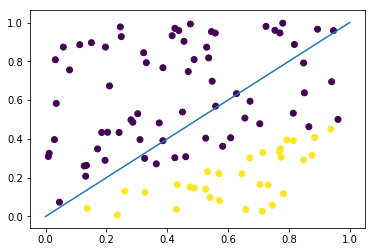

array([ 1.0521007 , -2.08184889])

In [9]:
# And we'll plot our untrained guesses
plt.plot(line, line)
plt.scatter(test_df['x'], test_df['y'], c=test_df['label'])
plt.show()

# The weights have yet to be adjusted
model.weights

In [10]:
# Now, let's train the model. We'll do iteratively, running the train method once per row of our training data
for idx in training_df.index:
    row = training_df.iloc[idx]
    x, y, label = row['x'], row['y'], row['label']
    model.train((x, y), label)
    
# What are the weights now?
model.weights

array([-0.2634372 ,  0.24204196])

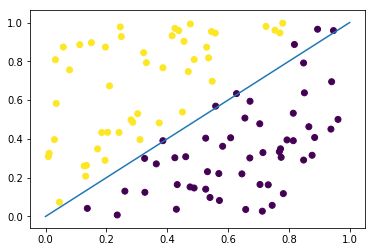

In [11]:
# Finally, let's see if our trained model can make better guesses
test_df['label'] = test_df.apply(lambda row: predict_class(model, row['x'], row['y']), axis=1)

plt.plot(line, line)
plt.scatter(test_df['x'], test_df['y'], c=test_df['label'])
plt.show()

## And There You Go

We've just succesfully created our very own artificial neural network, albeit a simple one.

What are some problems that you can point out with the perceptron? How might we fix them? Next time, we'll dive a little deeper into neural networks and hopefully we'll start using some that have been created by the pros.

Thanks alot, see ya next month.